In [3]:
# ========================
# 1. Import Libraries
# ========================
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [4]:
# ========================
# 2. Load Dataset
# ========================
df = pd.read_csv("loan_synthetic_dataset.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (12000, 16)


,loan_id,age,gender,education,employment_years,loan_amount,term_months,interest_rate,installment,purpose,annual_income,dti,credit_history_length,open_accounts,default_prob,default
0,1,44,Male,Masters,1.5,3000.0,36,8.50,94.70,Car,59745.0,0.019,4.8,5,0.0008,0
1,2,38,Male,Bachelors,0.8,12267.0,60,11.82,271.76,Business,64379.0,0.051,0.3,6,0.0018,0
2,3,46,Male,Bachelors,3.4,1203.0,36,17.55,43.22,Business,53144.0,0.010,7.3,2,0.0035,0
3,4,55,Male,High School,2.8,1000.0,60,9.32,20.91,Debt consolidation,62827.0,0.004,2.4,7,0.0027,0
4,5,37,Female,High School,0.2,9361.0,120,16.79,161.45,Debt consolidation,22027.0,0.088,1.2,5,0.0097,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_id                12000 non-null  int64  
 1   age                    12000 non-null  int64  
 2   gender                 12000 non-null  object 
 3   education              12000 non-null  object 
 4   employment_years       12000 non-null  float64
 5   loan_amount            12000 non-null  float64
 6   term_months            12000 non-null  int64  
 7   interest_rate          12000 non-null  float64
 8   installment            12000 non-null  float64
 9   purpose                12000 non-null  object 
 10  annual_income          12000 non-null  float64
 11  dti                    12000 non-null  float64
 12  credit_history_length  12000 non-null  float64
 13  open_accounts          12000 non-null  int64  
 14  default_prob           12000 non-null  float64
 15  de

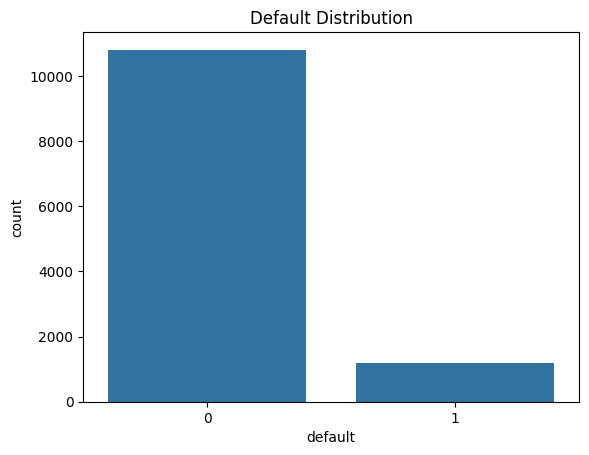

default
0    0.9
1    0.1
Name: proportion, dtype: float64


In [5]:
# ========================
# 3. Data Understanding
# ========================
df.info()
df.describe().T

# Check missing values
df.isnull().sum()

# Class balance
sns.countplot(x='default', data=df)
plt.title("Default Distribution")
plt.show()

print(df['default'].value_counts(normalize=True))


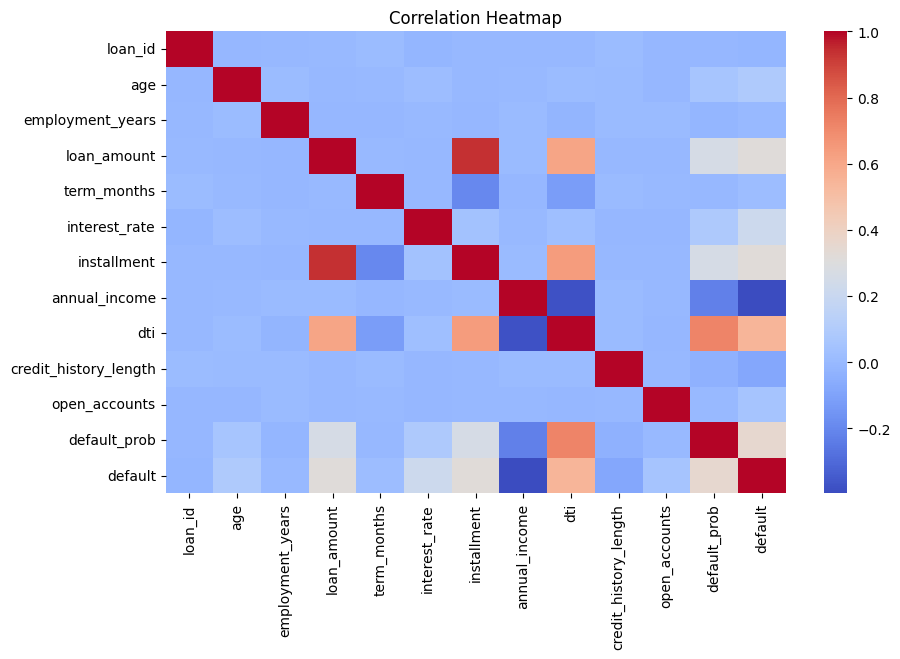

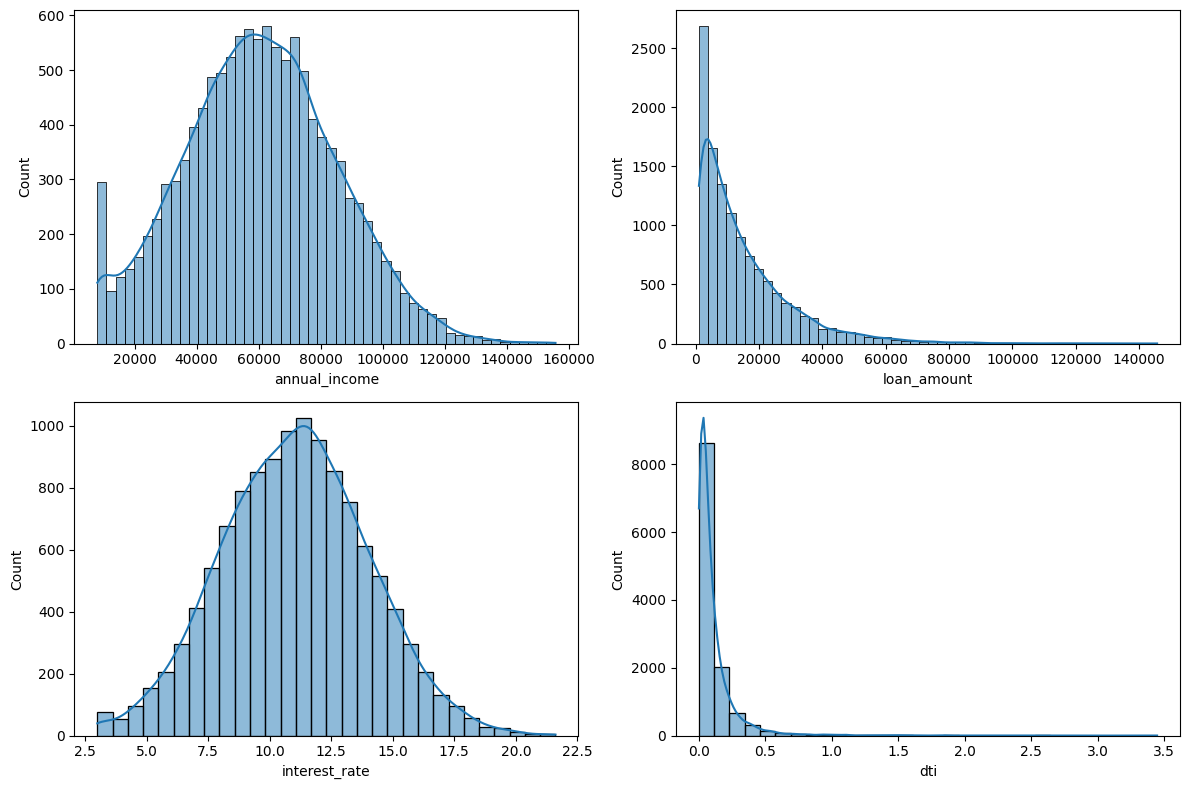

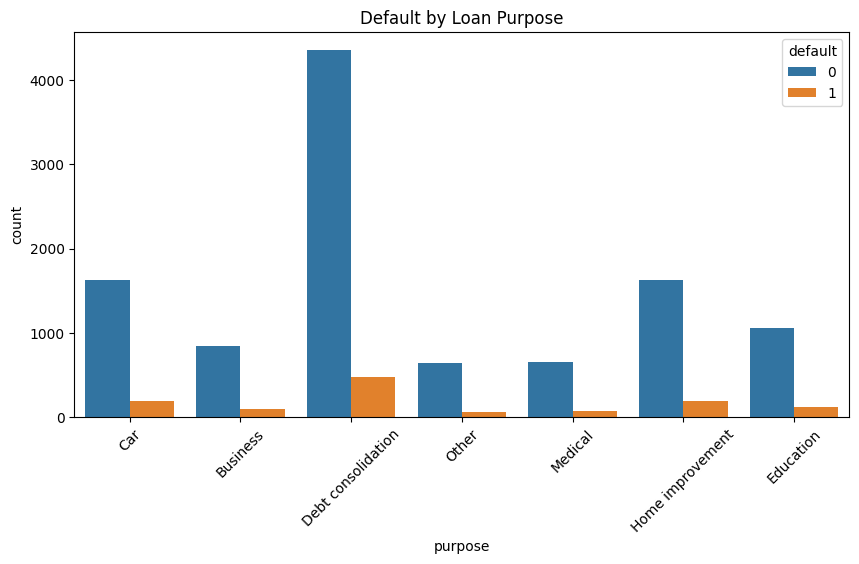

In [6]:
# ========================
# 4. Exploratory Data Analysis (EDA)
# ========================

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots
fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.histplot(df['annual_income'], bins=50, kde=True, ax=axes[0,0])
sns.histplot(df['loan_amount'], bins=50, kde=True, ax=axes[0,1])
sns.histplot(df['interest_rate'], bins=30, kde=True, ax=axes[1,0])
sns.histplot(df['dti'], bins=30, kde=True, ax=axes[1,1])
plt.tight_layout()
plt.show()

# Categorical analysis
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='default', data=df)
plt.xticks(rotation=45)
plt.title("Default by Loan Purpose")
plt.show()


In [7]:
# ========================
# 5. Feature Engineering
# ========================

# Drop IDs & probability column (not for model training)
df_model = df.drop(['loan_id', 'default_prob'], axis=1)

# Encode categorical variables
cat_cols = ['gender', 'education', 'purpose']
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Split X and y
X = df_model.drop('default', axis=1)
y = df_model['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))


X_train shape: (9600, 20)
y_train distribution:
 default
0    0.9
1    0.1
Name: proportion, dtype: float64



Logistic Regression:

Accuracy: 0.9820833333333333
ROC-AUC: 0.9967033179012346
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2160
           1       0.93      0.88      0.91       240

    accuracy                           0.98      2400
   macro avg       0.96      0.94      0.95      2400
weighted avg       0.98      0.98      0.98      2400



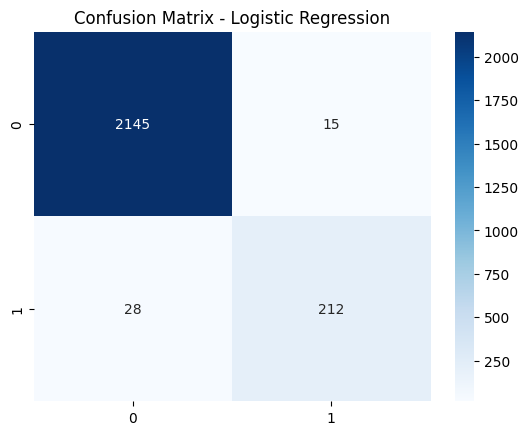


Decision Tree:

Accuracy: 0.93625
ROC-AUC: 0.820138888888889
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2160
           1       0.68      0.68      0.68       240

    accuracy                           0.94      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.94      0.94      0.94      2400



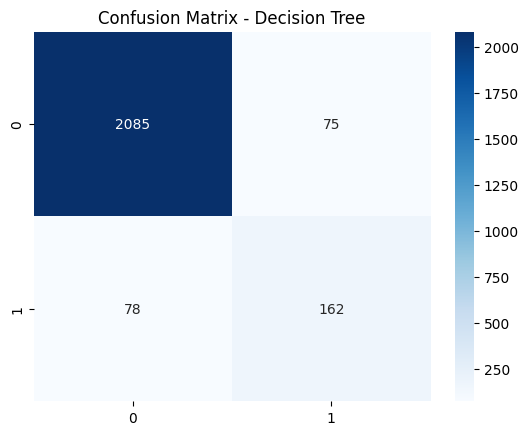


Random Forest:

Accuracy: 0.9583333333333334
ROC-AUC: 0.9849411651234568
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2160
           1       0.92      0.64      0.75       240

    accuracy                           0.96      2400
   macro avg       0.94      0.82      0.87      2400
weighted avg       0.96      0.96      0.95      2400



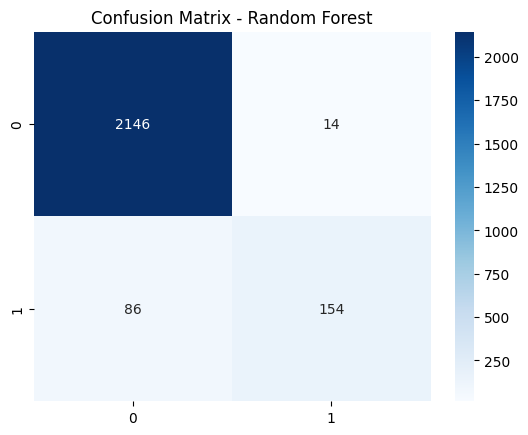


Gradient Boosting:

Accuracy: 0.96875
ROC-AUC: 0.9905111882716049
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2160
           1       0.94      0.74      0.83       240

    accuracy                           0.97      2400
   macro avg       0.95      0.87      0.90      2400
weighted avg       0.97      0.97      0.97      2400



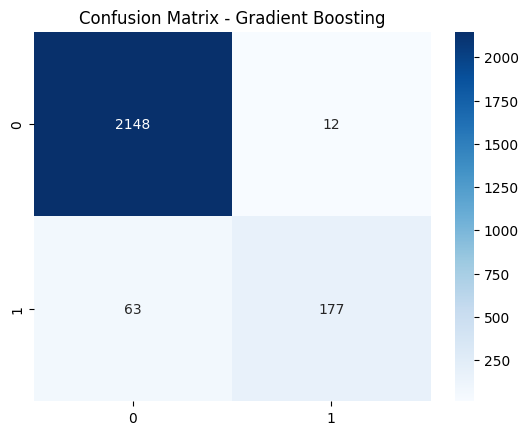


XGBoost:

Accuracy: 0.975
ROC-AUC: 0.9940142746913581
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2160
           1       0.91      0.83      0.87       240

    accuracy                           0.97      2400
   macro avg       0.95      0.91      0.93      2400
weighted avg       0.97      0.97      0.97      2400



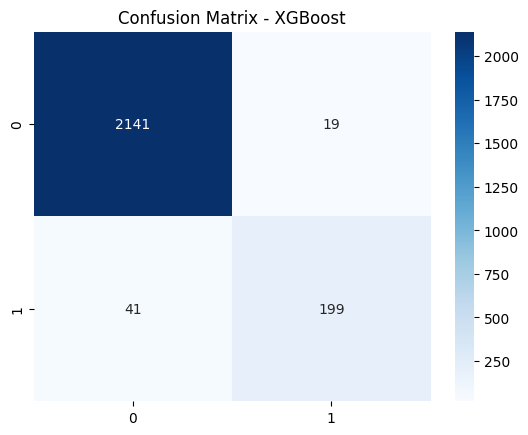


SVM:

Accuracy: 0.9783333333333334
ROC-AUC: 0.9951543209876543
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2160
           1       0.93      0.85      0.89       240

    accuracy                           0.98      2400
   macro avg       0.96      0.92      0.94      2400
weighted avg       0.98      0.98      0.98      2400



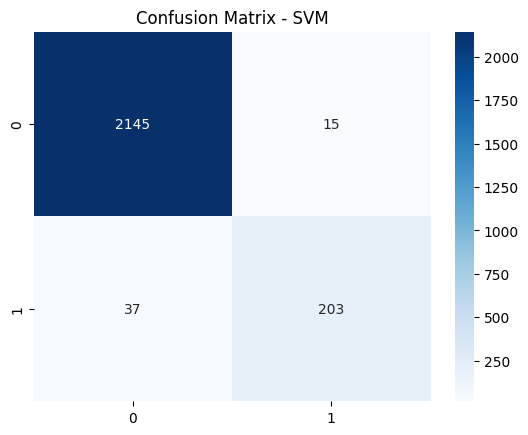

,Accuracy,ROC-AUC
Logistic Regression,0.982083,0.996703
Decision Tree,0.936250,0.820139
Random Forest,0.958333,0.984941
Gradient Boosting,0.968750,0.990511
XGBoost,0.975000,0.994014
SVM,0.978333,0.995154


In [8]:
# ========================
# 6. Model Training & Evaluation
# ========================

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    results[name] = {"Accuracy": acc, "ROC-AUC": roc}
    print(f"\n{name}:\n")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Compare results
pd.DataFrame(results).T


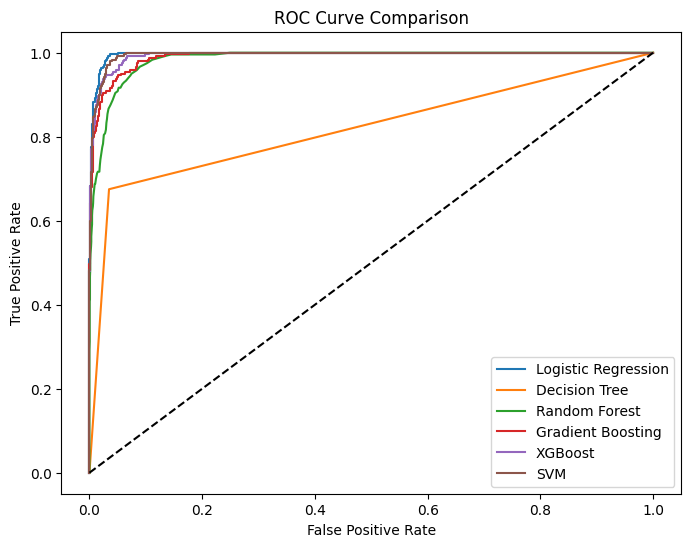

In [9]:
# ========================
# 7. ROC Curve Comparison
# ========================
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [10]:
# ========================
# 8. Save Best Model
# ========================
import joblib

best_model = RandomForestClassifier().fit(X_train, y_train)  # Replace with best
joblib.dump(best_model, "loan_default_model.pkl")
print("Model saved as loan_default_model.pkl")


Model saved as loan_default_model.pkl


In [12]:
# ========================
# Saved the Best Model: Logistic Regression	0.982083	0.996703
# ========================
import joblib

# Assuming you already trained LogisticRegression as best_model
best_model = LogisticRegression().fit(X_train, y_train)

# Save model to .pkl file
joblib.dump(best_model, "logistic_regression_model.pkl")
print("Model saved as logistic_regression_model.pkl")


Model saved as logistic_regression_model.pkl
